In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Import data:

In [2]:
df=pd.read_csv("Part1 - Car name.csv")
df.shape

(398, 1)

In [3]:
dfe=pd.read_json("Part1 - Car-Attributes.json")
dfe.shape

(398, 8)

In [4]:
df.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [5]:
dfe.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
data=df.join(dfe)

# Data cleansing:

In [7]:
def explore (x):
    
    print("\033[1m HEAD\n\033[0m",x.head())
    print("\033[1m\nTAIL\n\033[0m",x.tail())
    print("\033[1m\nDATA TYPES\n\033[0m",x.dtypes)
    print("\033[1m\nDESCRIBE\n\033[0m",x.describe())
    x = x.replace('', np.nan)
    print("\033[1m\nMissing value is:\033[0m",x.isnull().values.any())
    print("\033[1m\nDupicate value is:\033[0m",x.duplicated().values.any())
    print("\033[1m\nShape of Dataset:\033[0m",x.shape)
    print("\033[1m\nSize of Dataset:\033[0m",x.size)
    print("\033[1m\nUnique values: \n", df.nunique())

In [8]:
explore(data)

 HEAD
                     car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1

TAIL
             car_name   mpg  cyl   disp  hp    wt   acc  yr  origin
393  ford mustang gl  27.0    4  140.0  86  2790  15.6  82       1
394        vw pickup  44.0    4   97.0  52  2130  24.6  82       2
395    dodge rampage  32.0    4  135.0  84  2295  11.6  82       1
396      ford ranger  28.0    4  120.0  79  2625  18.6  82       1
397       chevy s-10  31.0    4  119.0  82  2720  19.4  82       1

DATA TYPES
 car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            i

#### There are no missing values in the data set
#### HP is of type Object byt it should be an integer, seems like there are soem missing values in it
#### Dist and Weight features might have few outliers
#### car name feature can be dropped

# Treating missing values

In [9]:
data['hp']=data['hp'].replace("?",np.nan)

In [10]:
data['hp'].isnull().values.sum()

6

There are 6 missing values in the hp feature. In a total of 398 cloumns there are only 6 missing values, we can either drop all of them or replace them. Dropping them doesnt have aby impact, here I wish to replace them with mean.

In [11]:
data['hp'] = data['hp'].replace(np.nan,data['hp'].mean(), regex=True)

In [12]:
data['hp'] = data['hp'].astype(int)

In [13]:
data.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp            int32
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

# Drop unnecessary fesatures

In [14]:
data.drop(['car_name'],axis=1,inplace=True)

In [15]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [16]:
data.origin.unique()

array([1, 3, 2], dtype=int64)

Creating dummy variables for origin

In [17]:
df1=pd.get_dummies(data, columns=['origin'], drop_first=True)


In [18]:
df1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,0


Year may not have much impact. Lets see the correlation values and decide if its important or can be dropped

# Analysing numerical features

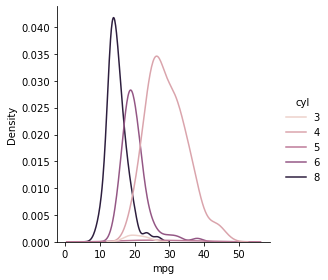

In [19]:
sns.displot(data=df1,x="mpg",hue="cyl",kind="kde",height=4);

Cars with 5 cylinders have mpg value ranging from 15-50
cars with 6 cylinders have mpg values ranging from 10-30
cars with 8 cylinders have mpg values ranging from 5-28
There are very few cars with 3 and 4 cylinders and their mpg ranges between 15-25

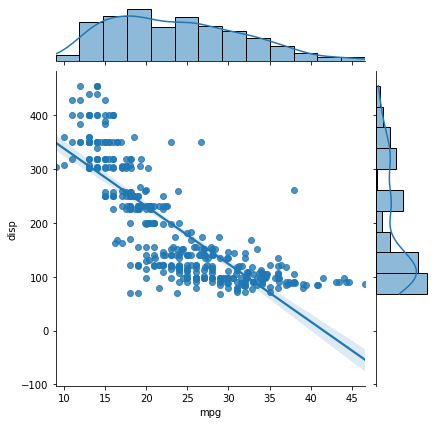

In [20]:
sns.jointplot(data=df1, x="mpg", y="disp", kind="reg")

There is negative correlation between mpg and disp, as the disp gets increased the mpg gets decreased.
Disp have a peak at 80-120 and is skewed which shows the presence of outliers
MPG is also right tailed so it might have outliers. Lets check it in 5 point analysis again

array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cyl'}>,
        <AxesSubplot:title={'center':'disp'}>],
       [<AxesSubplot:title={'center':'hp'}>,
        <AxesSubplot:title={'center':'wt'}>,
        <AxesSubplot:title={'center':'acc'}>],
       [<AxesSubplot:title={'center':'yr'}>,
        <AxesSubplot:title={'center':'origin_2'}>,
        <AxesSubplot:title={'center':'origin_3'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

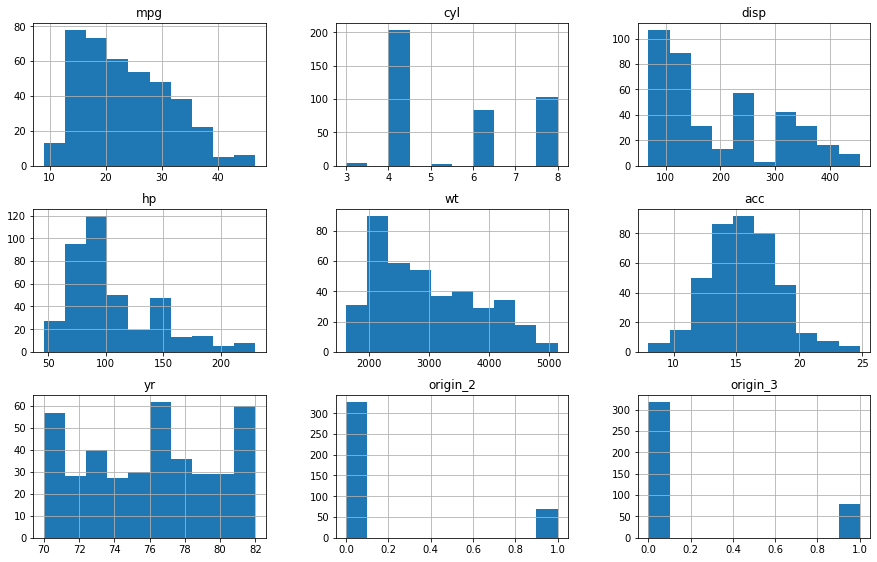

In [21]:
df1.hist(figsize=(15,30),layout=(9,3)) 

MPG is right tailed and it has outliers, there are many cars with mpg in range 13-38
There are many number of cars with 4,6 and 8 cylinders, 3 and 5 are very low in number that we can merge them in any other cylinder class as they have less impact
Disp ranges from 50-450 but 50% of the cars are having disp in range of 50-150
Acceleration is having a bell shape
Origin2 and Origin 3 cars are almost equal in number


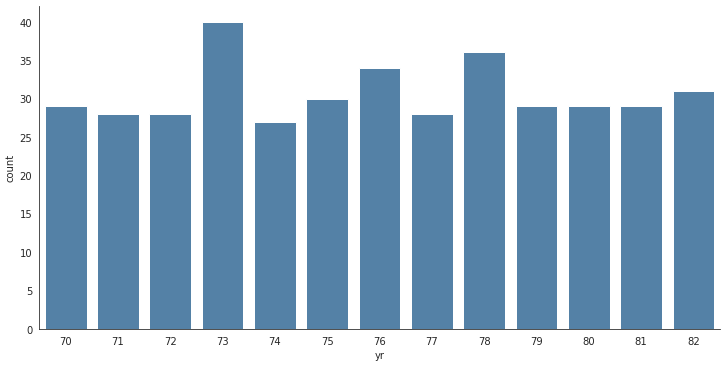

In [22]:
with sns.axes_style('white'):
    g = sns.factorplot("yr", data=df1, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=1)

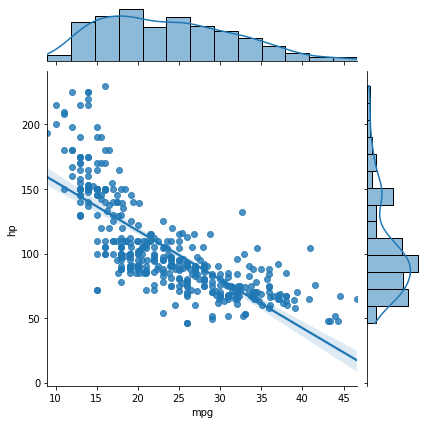

In [23]:
sns.jointplot(data=df1, x="mpg", y="hp", kind="reg")

There is a negative correlation between mpg and hp. Generally higher horsepower comes from burning more fuel, so get lower mpg
The density of data points are more between 15-35 for mpg and 50-100 for hp respectively

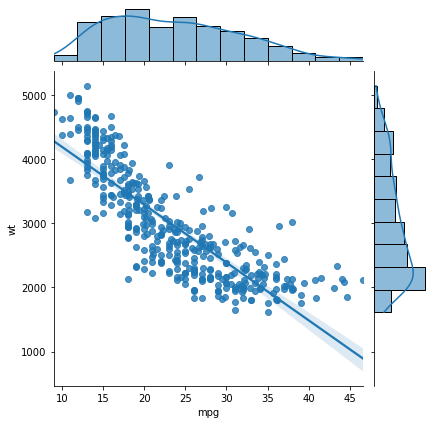

In [24]:
sns.jointplot(data=df1, x="mpg", y="wt", kind="reg")

Generally if a car weigts more mpg will be less as it burns more gas to run the vehicle. In our case its as expected, there is negative correlation between mpg and wt
Both MPG and weight are right tailed and they might have outliers 

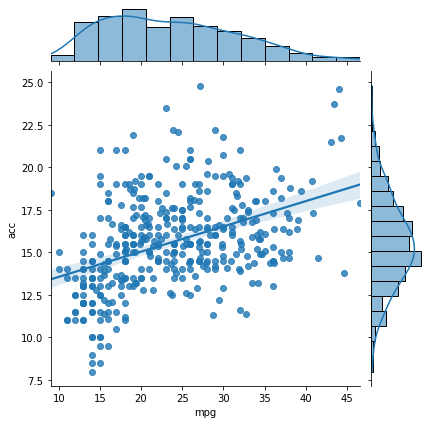

In [25]:
sns.jointplot(data=df1, x="mpg", y="acc", kind="reg")

To gain more more acceleration more gas should be burnt. So there is a positive correlation between mpg and acceleration as expected
acceleration is bell shaped and it might not have outliers. let's check for presense of outliers by plotting box plots for all the continuous variables

<AxesSubplot:title={'center':'hp'}, xlabel='origin', ylabel='hp'>

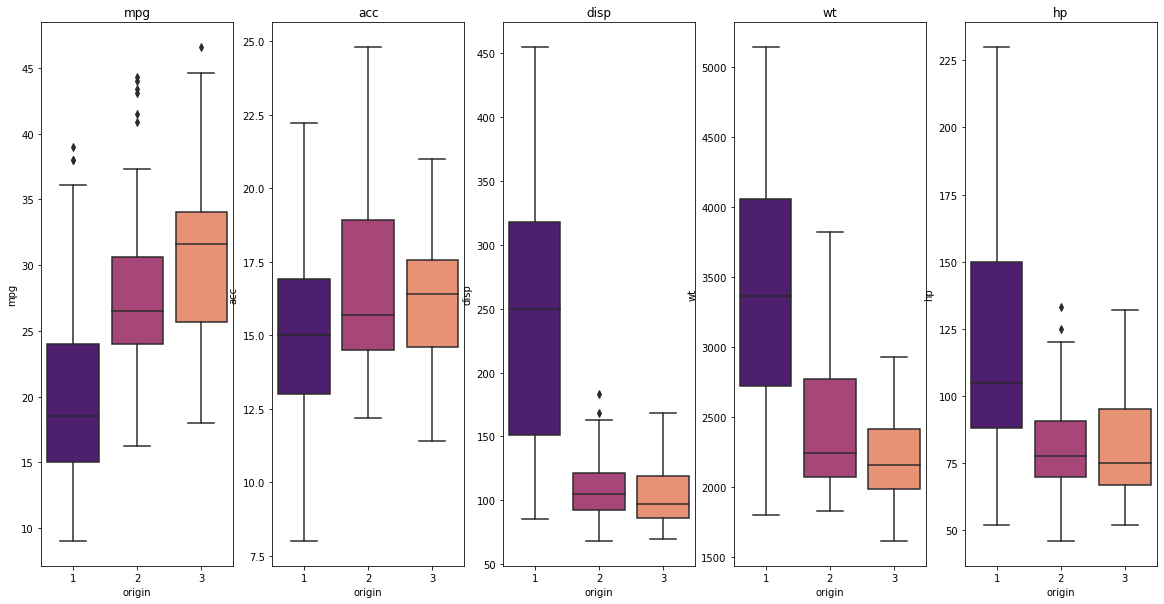

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(1, 5, 1)
plt.title('mpg')
sns.boxplot(x='origin', y='mpg', data= data,palette ='magma')

plt.subplot(1, 5, 2)
plt.title('acc')
sns.boxplot(x='origin', y='acc', data= data,palette ='magma')

plt.subplot(1, 5, 3)
plt.title('disp')
sns.boxplot(x='origin', y='disp', data= data,palette ='magma')

plt.subplot(1, 5, 4)
plt.title('wt')
sns.boxplot(x='origin', y='wt', data= data,palette ='magma')

plt.subplot(1, 5, 5)
plt.title('hp')
sns.boxplot(x='origin', y='hp', data= data,palette ='magma')

<AxesSubplot:>

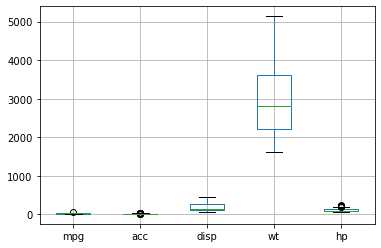

In [27]:
data.boxplot(column=["mpg", "acc","disp","wt","hp"])

mpg, acc and hp has outliers

In [28]:
df1.describe().transpose()  

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.462312,38.199230,46.0,76.000,95.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin_2,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0
origin_3,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0


There is variation  between 75% and max value for mpg so it has outliers as we supected above from graph.HP,acc aslo has variation
between 75% and max values so it also has outliers.


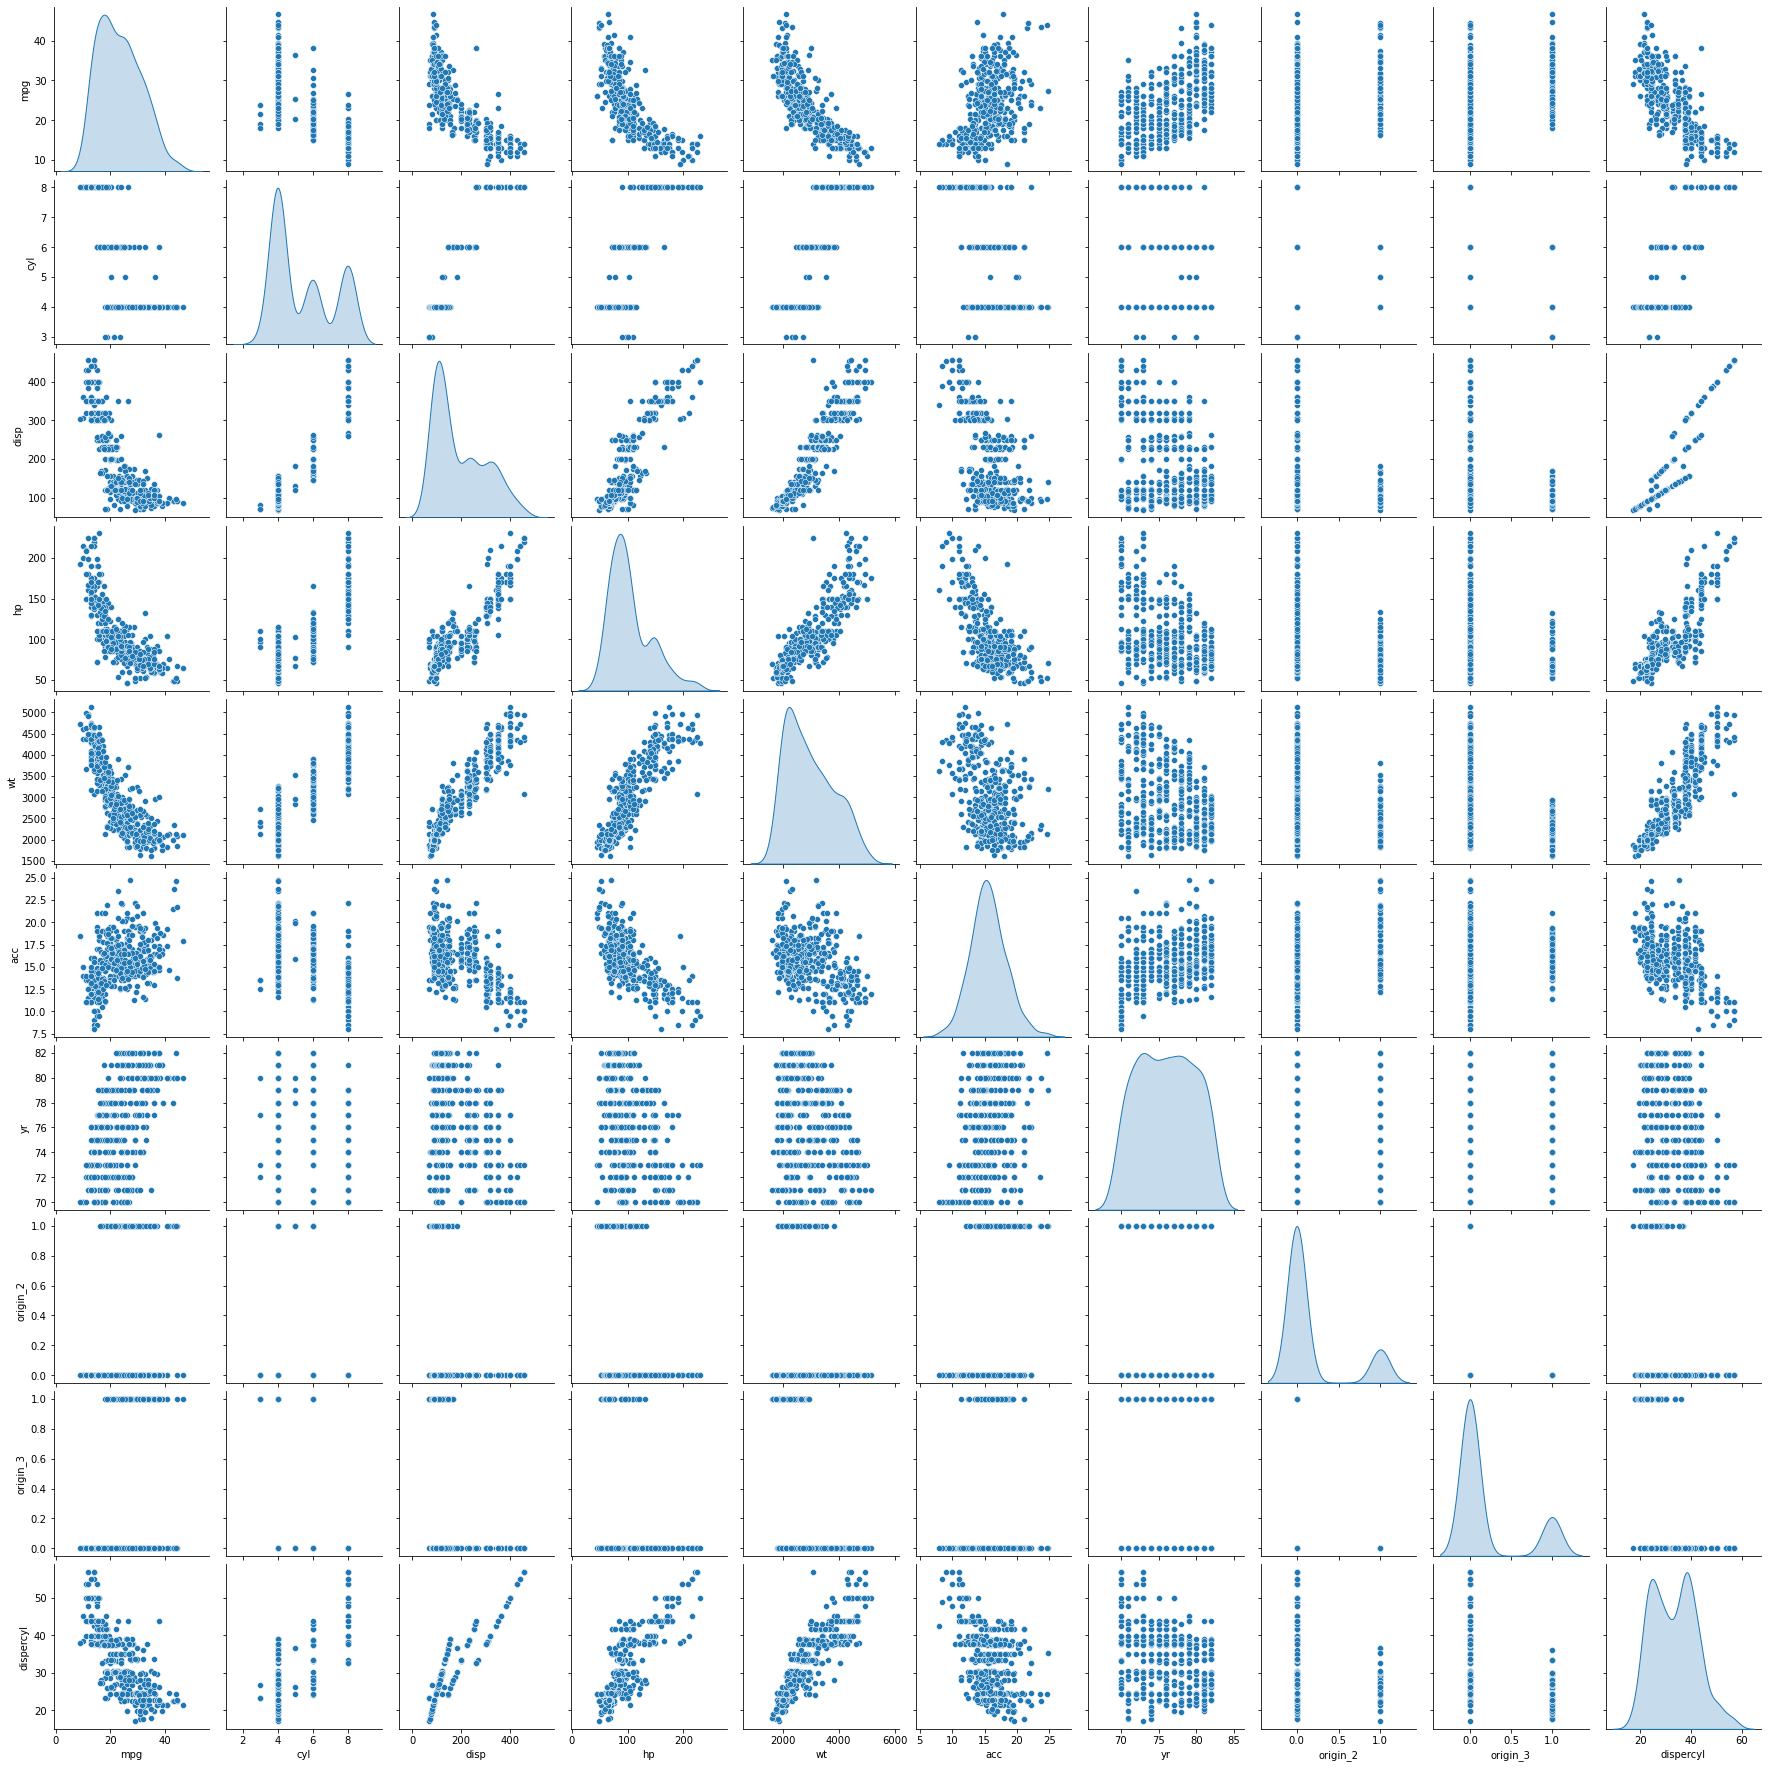

In [29]:
df1['dispercyl'] = df1['disp'] / df1['cyl']
sns.pairplot(df1, diag_kind='kde')

dispercyl field gives the distance travelled by a car per cylinder. Here we are plotting that value against all the other features like disp,hp,wt,
acc,yr. Also I see 3 peaks max in the above groups, so I assume this data can be divided into 3 clusters.

Also Dis, hp and wt are negatively related to mpg. However, acc is positively correlated in the above pair plot.

In [30]:
df1.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin_2,origin_3,dispercyl
mpg,1.000000,-0.775396,-0.804203,-0.771543,-0.831741,0.420289,0.579267,0.259022,0.442174,-0.773363
cyl,-0.775396,1.000000,0.950721,0.839061,0.896017,-0.505419,-0.348746,-0.352861,-0.396479,0.775244
disp,-0.804203,0.950721,1.000000,0.893760,0.932824,-0.543684,-0.370164,-0.373886,-0.433505,0.920171
hp,-0.771543,0.839061,0.893760,1.000000,0.860676,-0.684376,-0.411750,-0.281334,-0.321232,0.808785
wt,-0.831741,0.896017,0.932824,0.860676,1.000000,-0.417457,-0.306564,-0.298843,-0.440817,0.874531
acc,0.420289,-0.505419,-0.543684,-0.684376,-0.417457,1.000000,0.288137,0.204473,0.109144,-0.473430
yr,0.579267,-0.348746,-0.370164,-0.411750,-0.306564,0.288137,1.000000,-0.024489,0.193101,-0.303936
origin_2,0.259022,-0.352861,-0.373886,-0.281334,-0.298843,0.204473,-0.024489,1.000000,-0.229895,-0.380739
origin_3,0.442174,-0.396479,-0.433505,-0.321232,-0.440817,0.109144,0.193101,-0.229895,1.000000,-0.480273
dispercyl,-0.773363,0.775244,0.920171,0.808785,0.874531,-0.473430,-0.303936,-0.380739,-0.480273,1.000000


Year and Origin don't add much value to the data set so those 2 features can be popped

In [31]:
df1.pop('origin_2')
df1.pop('origin_3')
df1.pop('yr')

0      70
1      70
2      70
3      70
4      70
       ..
393    82
394    82
395    82
396    82
397    82
Name: yr, Length: 398, dtype: int64

In [32]:
df1.head()

,mpg,cyl,disp,hp,wt,acc,dispercyl
0,18.0,8,307.0,130,3504,12.0,38.375
1,15.0,8,350.0,165,3693,11.5,43.750
2,18.0,8,318.0,150,3436,11.0,39.750
3,16.0,8,304.0,150,3433,12.0,38.000
4,17.0,8,302.0,140,3449,10.5,37.750


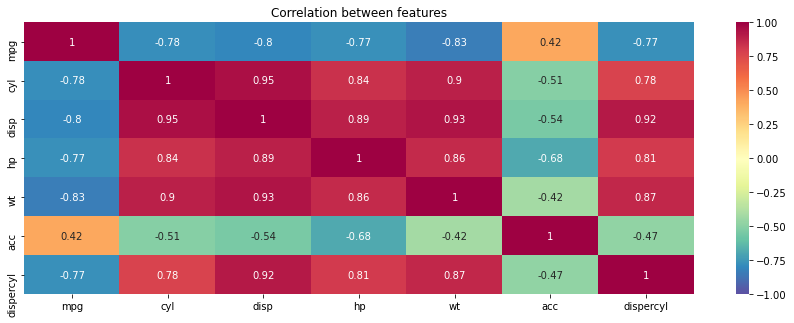

In [33]:
corr = df1.corr() 
plt.figure(figsize=(15, 5))

sns.heatmap(corr, cmap='Spectral_r', annot=True, vmax=1.0, vmin=-1.0)

# specify name of the plot
plt.title('Correlation between features')
plt.show()

In [34]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

df2 = df1.loc[:, 'mpg':'acc']
X = df2.drop(['mpg'], axis=1)
# the dependent variable
Y = df2[['mpg']]
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [35]:
from sklearn.linear_model import LinearRegression
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

# Let us explore the coefficients for each of the independent attributes

b1 = regression_model.coef_
b0 = regression_model.intercept_
print("b1 is: {} and b0 is: {}".format(b1, b0))

b1 is: [[-0.34741692 -0.00102002 -0.04580608 -0.00525783 -0.07096971]] and b0 is: [47.02965879]


In [36]:
Y_pred = regression_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
mse = mean_squared_error(Y_test, Y_pred)
rms = sqrt(mse)
r2Score = r2_score(Y_test, Y_pred)
print("The Root Mean Sq Error is {} and R^2 error is {}".format(rms,r2Score))

The Root Mean Sq Error is 3.839620067642482 and R^2 error is 0.7478458451291288


In [37]:
regression_model.score(X_train,Y_train)

0.6871159766579481

In [38]:
regression_model.score(X_test,Y_test)

0.7478458451291288

In [39]:
from scipy.stats import zscore
Scaled=df2.apply(zscore)
Scaled.head()

,mpg,cyl,disp,hp,wt,acc
0,-0.706439,1.498191,1.090604,0.669381,0.630870,-1.295498
1,-1.090751,1.498191,1.503514,1.586783,0.854333,-1.477038
2,-0.706439,1.498191,1.196232,1.193611,0.550470,-1.658577
3,-0.962647,1.498191,1.061796,1.193611,0.546923,-1.295498
4,-0.834543,1.498191,1.042591,0.931496,0.565841,-1.840117


In [40]:
covMatrix = np.cov(Scaled,rowvar=False)
print(covMatrix)

[[ 1.00251889 -0.77734942 -0.80622852 -0.77348628 -0.833836    0.42134757]
 [-0.77734942  1.00251889  0.95311615  0.84117436  0.89827376 -0.50669259]
 [-0.80622852  0.95311615  1.00251889  0.89601126  0.93517383 -0.54505356]
 [-0.77348628  0.84117436  0.89601126  1.00251889  0.86284386 -0.68609998]
 [-0.833836    0.89827376  0.93517383  0.86284386  1.00251889 -0.41850885]
 [ 0.42134757 -0.50669259 -0.54505356 -0.68609998 -0.41850885  1.00251889]]


# Finding Cluster

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

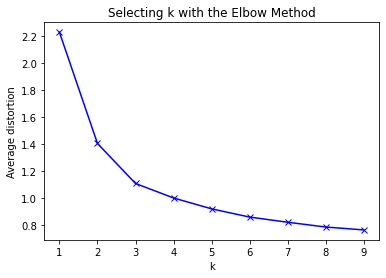

In [41]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(Scaled)
    prediction=model.predict(Scaled)
    meanDistortions.append(sum(np.min(cdist(Scaled, model.cluster_centers_, 'euclidean'), axis=1)) / Scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

There is a bend  at 2 and 3 but 3 seems to be ideal.

In [42]:
from sklearn.metrics import silhouette_samples, silhouette_score
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
  }
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
   
 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(Scaled)
    score = silhouette_score(Scaled, kmeans.labels_)
    silhouette_coefficients.append(score)
silhouette_coefficients


[0.5454859127878214,
 0.4393412071129981,
 0.3786897326794233,
 0.3689331057064364,
 0.33175822400235266,
 0.3188761908820789,
 0.2920400114940615,
 0.27707779262085724]

In [43]:
final_model=KMeans(3)
final_model.fit(Scaled)
prediction=final_model.predict(Scaled)

#Append the prediction 
df2["GROUP"] = prediction
Scaled["GROUP"] = prediction
print("Groups Assigned : \n")
Scaled.head()


Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,GROUP
0,-0.706439,1.498191,1.090604,0.669381,0.630870,-1.295498,0
1,-1.090751,1.498191,1.503514,1.586783,0.854333,-1.477038,0
2,-0.706439,1.498191,1.196232,1.193611,0.550470,-1.658577,0
3,-0.962647,1.498191,1.061796,1.193611,0.546923,-1.295498,0
4,-0.834543,1.498191,1.042591,0.931496,0.565841,-1.840117,0


In [44]:
df2.head()

,mpg,cyl,disp,hp,wt,acc,GROUP
0,18.0,8,307.0,130,3504,12.0,0
1,15.0,8,350.0,165,3693,11.5,0
2,18.0,8,318.0,150,3436,11.0,0
3,16.0,8,304.0,150,3433,12.0,0
4,17.0,8,302.0,140,3449,10.5,0


In [45]:
Clust = df2.groupby(['GROUP'])
Clust.mean()

,mpg,cyl,disp,hp,wt,acc
GROUP,,,,,,
0,14.528866,7.979381,348.020619,161.804124,4143.969072,12.641237
1,29.400000,4.004831,109.780193,78.787440,2306.067633,16.563285
2,19.826596,6.042553,218.095745,101.829787,3222.425532,16.396809


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>]],
      dtype=object)

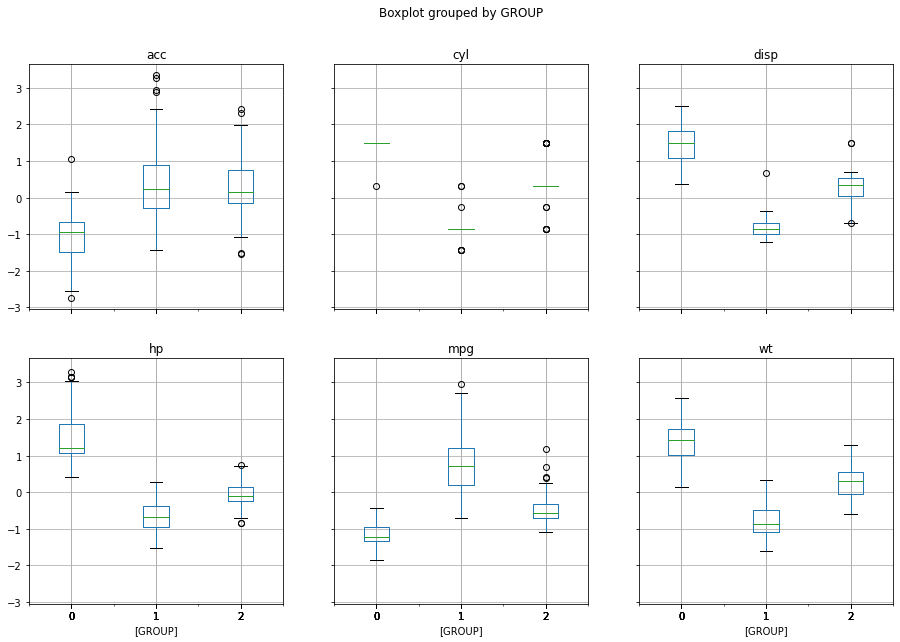

In [46]:
Scaled.boxplot(by='GROUP', layout = (2,3),figsize=(15,10))

There are many outliers in all the features except weight. Lets handle these outliers as below:

In [47]:
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (Scaled.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(Scaled['GROUP']))

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

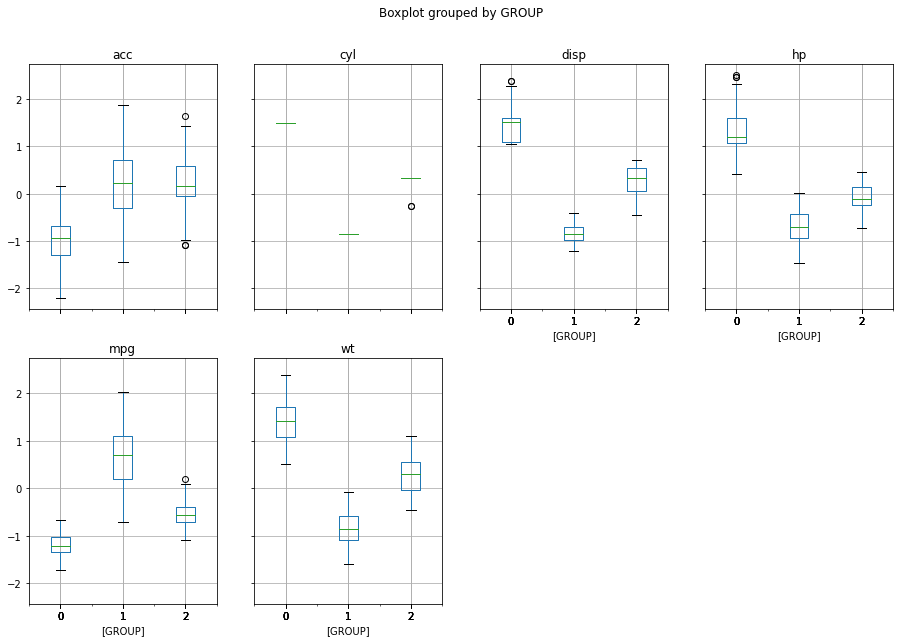

In [48]:
concat_data.boxplot(by = 'GROUP', layout=(2,4), figsize=(15, 10))

Now we are able to handle extreme outliers

In [49]:
concat_data.describe()

,mpg,cyl,disp,hp,wt,acc,GROUP
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,-0.062861,-0.007395,-0.009361,-0.054201,-0.023391,-0.068419,0.992462
std,0.932581,0.977211,0.979204,0.885636,1.011237,0.829755,0.693579
min,-1.731270,-0.856321,-1.204411,-1.453750,-1.604943,-2.203196,0.000000
25%,-0.834543,-0.856321,-0.856318,-0.693617,-0.882827,-0.605648,1.000000
50%,-0.194023,-0.856321,-0.431404,-0.313550,-0.296088,-0.024722,1.000000
75%,0.702705,0.320935,0.639283,0.407266,0.765953,0.483588,1.000000
max,2.034986,1.498191,2.367746,2.504185,2.396110,1.863288,2.000000


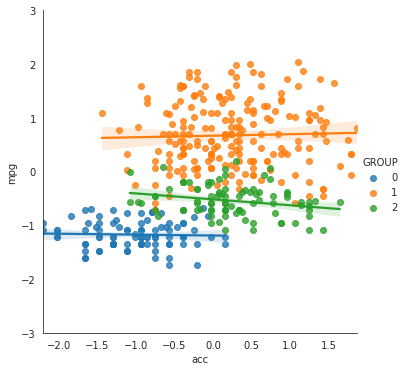

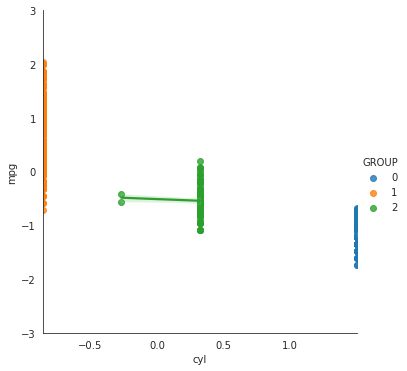

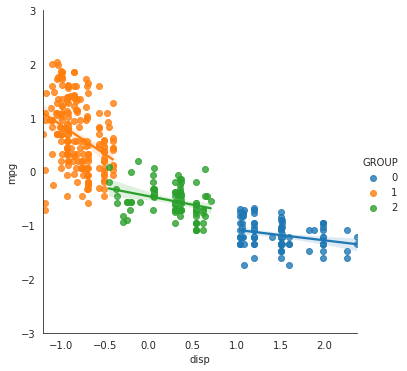

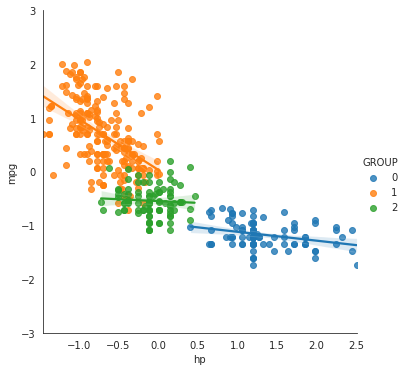

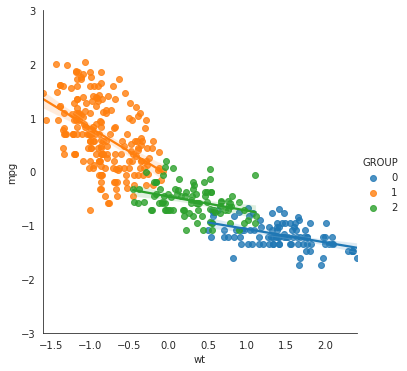

In [50]:
with sns.axes_style("white"):
    cols = ['acc', 'cyl', 'disp','hp','wt']
    for i in range(len(cols)):
        plot = sns.lmplot(cols[i],'mpg',data=concat_data,hue='GROUP')
        plot.set(ylim = (-3,3))

All the above graphs shows how the clusters are formed with respect to mpg

In [51]:
Scaled.GROUP.value_counts().sort_index()

0     97
1    207
2     94
Name: GROUP, dtype: int64

Class 1 have many values when compared to class 0 and 2

# Now lets check the formation of clusters using Hierarchieal clustering technique

In [52]:
df3= concat_data.loc[:,'mpg':'acc']
Hdf = df3.apply(zscore)

In [53]:
from sklearn.cluster import AgglomerativeClustering 

model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(Hdf)
df3['labels'] = model.labels_
df3.head(10)



,mpg,cyl,disp,hp,wt,acc,labels
0,-0.706439,1.498191,1.090604,0.669381,0.630870,-1.295498,1
1,-1.090751,1.498191,1.503514,1.586783,0.854333,-1.477038,1
2,-0.706439,1.498191,1.196232,1.193611,0.550470,-1.658577,1
3,-0.962647,1.498191,1.061796,1.193611,0.546923,-1.295498,1
4,-0.834543,1.498191,1.042591,0.931496,0.565841,-1.840117,1
5,-1.090751,1.498191,2.262118,2.451762,1.620492,-2.021656,1
6,-1.218855,1.498191,1.503514,1.193611,1.635863,-0.932419,1
7,-1.218855,1.498191,2.367746,1.193611,1.586204,-0.932419,1
8,-1.218855,1.498191,1.503514,1.193611,1.719809,-2.021656,1
9,-1.090751,1.498191,1.887617,2.242070,1.039961,-0.932419,1


In [54]:
custDataClust = df3.groupby(['labels'])
custDataClust.mean()

,mpg,cyl,disp,hp,wt,acc
labels,,,,,,
0,-0.541675,0.308411,0.264782,-0.092425,0.296971,0.232137
1,-1.172632,1.498191,1.454808,1.317102,1.412643,-1.015890
2,0.674609,-0.856321,-0.819960,-0.679434,-0.841794,0.239080


In [55]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
Z = linkage(Hdf, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(Hdf))
print(c)

0.8523630865651933


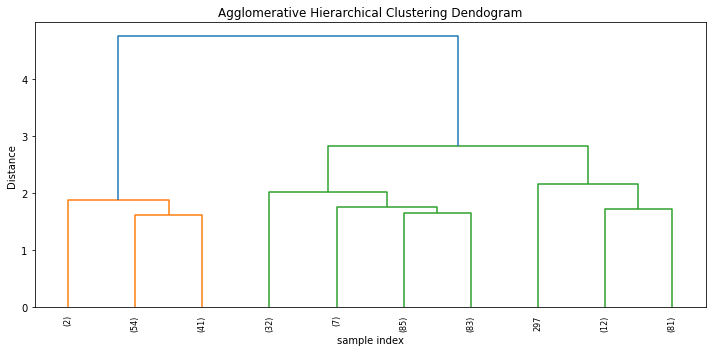

In [56]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,truncate_mode='lastp',
                 p = 10, leaf_font_size=8. )
plt.tight_layout()

Using K means is very as we dont have to guess the number of clusters, we check for number of cluster and on drawing the graph we find the perfect number of clusters seeing the elbow bend.
Agglomerative clustering is computationally challenging as the distance calculation is required for all the data points and its time consuming if the data set is large

# Performing linear regression on individula groups

In [98]:
Gr1 = df2[df2['GROUP']==0]
Gr1.head()

,mpg,cyl,disp,hp,wt,acc,GROUP
0,18.0,8,307.0,130,3504,12.0,0
1,15.0,8,350.0,165,3693,11.5,0
2,18.0,8,318.0,150,3436,11.0,0
3,16.0,8,304.0,150,3433,12.0,0
4,17.0,8,302.0,140,3449,10.5,0


In [93]:
DfGr1 = Gr1.loc[:, 'mpg':'acc']

Gr1_X = DfGr1.drop(['mpg'], axis=1)
Gr1_Y = DfGr1[['mpg']]
Gr1_X_train, Gr1_X_test, Gr1_Y_train, Gr1_Y_test = train_test_split(Gr1_X, Gr1_Y, test_size=0.30, random_state=1)

In [94]:
regression_model = LinearRegression()
regression_model.fit(Gr1_X_train, Gr1_Y_train)

# Let us explore the coefficients for each of the independent attributes

b1 = regression_model.coef_
b0 = regression_model.intercept_
print("b1 is: {} and b0 is: {}".format(b1, b0))

b1 is: [[-0.38594651  0.14322956 -0.25015309 -0.1941371  -0.0671942 ]] and b0 is: [-0.21970767]


In [95]:
Gr1_Y_pred = regression_model.predict(Gr1_X_test)
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
Gr1_mse = mean_squared_error(Gr1_Y_test, Gr1_Y_pred)
Gr1_rms = sqrt(Gr1_mse)
Gr1_r2Score = r2_score(Gr1_Y_test, Gr1_Y_pred)
print("The Root Mean Sq Error is {} and R^2 error is {}".format(Gr1_rms,Gr1_r2Score))

The Root Mean Sq Error is 0.2355533879199731 and R^2 error is 0.08740725376233449


In [96]:
regression_model.score(Gr1_X_train,Gr1_Y_train)

0.4862181303124733

In [97]:
regression_model.score(Gr1_X_test,Gr1_Y_test)

0.08740725376233449

Perform linear regression on next group

In [80]:
Gr2 = df2[df2['GROUP']==1]
Gr2.head()

,mpg,cyl,disp,hp,wt,acc,GROUP
14,24.0,4,113.0,95,2372,15.0,1
18,27.0,4,97.0,88,2130,14.5,1
19,26.0,4,97.0,46,1835,20.5,1
20,25.0,4,110.0,87,2672,17.5,1
21,24.0,4,107.0,90,2430,14.5,1


In [81]:
DfGr2 = Gr2.loc[:, 'mpg':'acc']

Gr2_X = DfGr2.drop(['mpg'], axis=1)
Gr2_Y = DfGr2[['mpg']]
Gr2_X_train, Gr2_X_test, Gr2_Y_train, Gr2_Y_test = train_test_split(Gr2_X, Gr2_Y, test_size=0.30, random_state=1)

In [82]:
regression_model_Gr2 = LinearRegression()
regression_model_Gr2.fit(Gr2_X_train, Gr2_Y_train)

# Let us explore the coefficients for each of the independent attributes

Gr2_b1 = regression_model_Gr2.coef_
Gr2_b0 = regression_model_Gr2.intercept_
print("b1 is: {} and b0 is: {}".format(Gr2_b1, Gr2_b0))

b1 is: [[ 5.27191701e+00 -1.32297936e-02 -1.52058990e-01 -4.31551657e-03
  -4.63820218e-02]] and b0 is: [32.73328476]


In [83]:
Gr2_Y_pred = regression_model_Gr2.predict(Gr2_X_test)
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
Gr2_mse = mean_squared_error(Gr2_Y_test, Gr2_Y_pred)
Gr2_rms = sqrt(Gr1_mse)
Gr2_r2Score = r2_score(Gr2_Y_test, Gr2_Y_pred)
print("The Root Mean Sq Error is {} and R^2 error is {}".format(Gr2_rms,Gr2_r2Score))

The Root Mean Sq Error is 1.8387672135253896 and R^2 error is 0.17904013710563016


In [84]:
regression_model.score(Gr2_X_train,Gr2_Y_train)

-0.38934452554634524

In [85]:
regression_model.score(Gr2_X_test,Gr2_Y_test)

-0.10342156094135735

Performing linear regression on next group

In [86]:
Gr3 = df2[df2['GROUP']==2]
Gr3.head()

,mpg,cyl,disp,hp,wt,acc,GROUP
15,22.0,6,198.0,95,2833,15.5,2
16,18.0,6,199.0,97,2774,15.5,2
17,21.0,6,200.0,85,2587,16.0,2
24,21.0,6,199.0,90,2648,15.0,2
33,19.0,6,232.0,100,2634,13.0,2


In [87]:
DfGr3 = Gr3.loc[:, 'mpg':'acc']
Gr3_X = DfGr3.drop(['mpg'], axis=1)
Gr3_Y = DfGr3[['mpg']]
Gr3_X_train, Gr3_X_test, Gr3_Y_train, Gr3_Y_test = train_test_split(Gr3_X, Gr3_Y, test_size=0.30, random_state=1)

In [88]:
regression_model_Gr3 = LinearRegression()
regression_model_Gr3.fit(Gr3_X_train, Gr3_Y_train)

# Let us explore the coefficients for each of the independent attributes

Gr3_b1 = regression_model_Gr3.coef_
Gr3_b0 = regression_model_Gr3.intercept_
print("b1 is: {} and b0 is: {}".format(Gr3_b1, Gr3_b0))

b1 is: [[ 1.79283241 -0.02141485  0.03765275 -0.00391572  0.00475829]] and b0 is: [22.23586075]


In [89]:
Gr3_Y_pred = regression_model_Gr3.predict(Gr3_X_test)
Gr3_mse = mean_squared_error(Gr3_Y_test, Gr3_Y_pred)
Gr3_rms = sqrt(Gr3_mse)
Gr3_r2Score = r2_score(Gr3_Y_test, Gr3_Y_pred)
print("The Root Mean Sq Error is {} and R^2 error is {}".format(Gr3_rms,Gr3_r2Score))

The Root Mean Sq Error is 3.0037377122024593 and R^2 error is 0.012543531197823699


In [90]:
regression_model_Gr3.score(Gr3_X_train,Gr3_Y_train)

0.351061334316356

In [91]:
regression_model_Gr3.score(Gr3_X_test,Gr3_Y_test)

0.012543531197823699

RMSE of linear regression when performed on the whole dataset is 49% However, the RMSE value of Group 0  is 31%, Group 1 is 38% abd Group 2 is 23%
Its clearly seen that on dividing data set into individual data sets and performing linear regression gives better RMSE values.

Group 2 cars have more mpg value. If a customer want more mpg then the customer should choose a car with less weight and less hp.
The order for customers to purchase a car is Group2, Group0, Group1

On replacing the outliers with median the mpg standard deviation value is decrease by 0.1

Quality: Quality of the data set seems to be pretty good as there are only 6 null values in HP feature the rest ar all good. But the data set team would have given more important features like cost and car type. If these eatures are included then it would be easy for us to gain more insights based on the cost and car type and also we can check what type of car gives much mpg.

Quantity: with the given amount of data we are able to divide the data into clusters but if the data set is having more more than what we have now then the algorithm would have learned more from the data points and divide clusters with more accuracy.</b>It is always beneficial to have more data always

Variety: In the given data set we have dealt with numbers and categorical data. But as far as variety of the data is concerned, it is always helpful to collect more and more data in any form that we could. Like, it may be helpful if the data collection team could collect some more category of information related to cars and types. 

Velocity: As far as velocity is concerned its better to collect the data of new cars so that we can check which car having what type of features is giving more MPG value. If the data is old then the new changes in car features will be missed in our analysis

Veracity: The data looks quite authentic however there are a few outliers, null values and that is common.

HP and weigt of car is inversely proportional to mpg and acc is directly proportional. We can say that if a customer want more mpg then the car having less weight and hp should be considered.